## <center> Akhilesh Bhaugeerutty & Magib Seck & Mouad Tai <b/>
### <center> Exercices Python

#### Exercices à rendre pour le 02/03: - Partie I
Exercice 1 page 91 & Exercice 2 page 92.

#### Exercice 1:

Nous allons aujourd'hui travailler sur des Forêts Aléatoires. Combinant plusieurs arbres de décision, elles sont réputées pour leur efficacité et précision.<br>
Encore une fois, nous allons utiliser le dataframe **credit**, puis le diviser en échantillons de test/apprentissage. 

In [115]:
import pandas as pd
import numpy as np 
credit = pd.read_pickle("Downloads/credit.pkl")
credit.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,+
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,+
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,+
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,+
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,+


In [116]:
from sklearn.model_selection import train_test_split
variables = [x for x in credit.columns if x!='A16'] 
X = credit[variables] 
Y = credit['A16']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=1998)

La forêt aléatoire nécessite de certains paramètres. Nous allons utiliser un nombre maximum de 60 & une profondeur maximale de 6 noeuds. (données arbitrairement choisies)

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=60,max_depth=6,
                             max_features=0.6,random_state=1998) 
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=1998,
                       verbose=0, warm_start=False)

In [118]:
Y_pred = clf.predict(X_test)

On mesure la précision (accuracy), puis le score AUC à l'aide des métriques de sklearn:  

In [119]:
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,Y_pred)

0.8657407407407407

In [120]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.9190905190905191

La matrice de confusion est telle: 

In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,clf.predict(X_test))

array([[89, 16],
       [13, 98]], dtype=int64)

Par souci de clarté, nous allons l'afficher d'une meilleure manière (plus agréable à voir..)

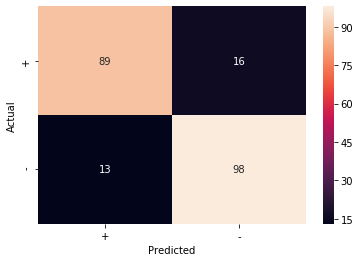

In [162]:
import seaborn as sns

data = {'Actual':    Y_test,
        'Predicted': clf.predict(X_test)
        }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
confmat = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confmat, annot=True)


On va maintenant tracer la courbe ROC. Pour ce faire, il faudra d'abord remplacer la colonne cible par une variable indicatrice. Le '+' et '-' ne seront pas reconnus sinon:

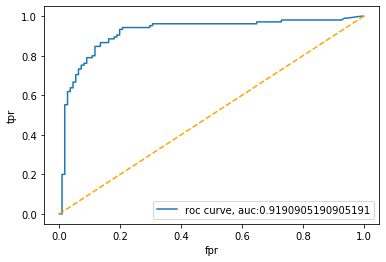

In [135]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


####### On change la target column
creditbis = credit.copy()
creditbis['y'] = np.where(creditbis['A16']=='+', '1', '0')
creditbis = creditbis.drop(columns = ['A16'])
variables = [x for x in creditbis.columns if x!='y'] 
Xb = creditbis[variables] 
Yb = creditbis['y']
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split(Xb,Yb,test_size=0.33, random_state=1998)
Yb_test = '1' <= Yb_test #on remplace par des booléens
clf2 = RandomForestClassifier(n_estimators=60,max_depth=6,
                             max_features=0.6,random_state=1998) 
clf2.fit(Xb_train,Yb_train)

######## Courbe ROC
fpr, tpr, threshold = roc_curve(Yb_test,clf2.predict_proba(Xb_test)[:,1])
auc(fpr,tpr)
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)


La courbe ROC monte plutôt rapidement. 


Nous allons enfin lancer une Cross Validation pour trouver les meilleurs paramètres, et ensuite lancer une dernière classification avec ceux-ci: 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(3,20)),
              'max_depth':list(range(3,10)),
              'max_features':list(range(5,20)),
              'criterion':['gini','entropy']}
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
clf = GridSearchCV(rdf, parameters,scoring='roc_auc')
clf.fit(X_train,Y_train)

In [85]:
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 13}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9552199291862566


In [101]:
clnew = RandomForestClassifier(n_estimators=13,max_depth=5,
                             max_features=11, criterion = 'gini', 
                               random_state=1998) 
clnew.fit(X_train,Y_train)
Y_pred = clnew.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8611111111111112

On voit bien que l'accuracy a augmenté, tout comme le score ROC. 

#### Exercice 2

En utilisant le même jeu de données, nous allons à présent faire un Gradient Boosting, technique de plus en plus utilisée et mathématiquement plus complexe. Nous avons pas besoin de re-organiser les données, donc on peut immédiatement lancer la phase d'apprentissage, puis tester:  

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                 max_depth=3, random_state=1998)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1998, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

On va tester ce modèle avec les ensembles de test, en calculant la précision puis le score AUC: 

In [158]:
print('accuracy =', accuracy_score(Y_test,gbc.predict(X_test)))
print('AUC =', roc_auc_score(Y_test,gbc.predict_proba(X_test)[:,1]))

accuracy = 0.8333333333333334
AUC = 0.9151437151437152


Comme souvent, on voit que la Random Forest est plus efficace et précise, toutefois, le temps de calcul a été réduit. 

Une nouvelle fois, nous allons tracer la courbe ROC: 

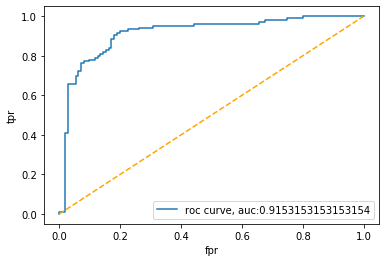

In [159]:
gbc2 =  GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                 max_depth=3, random_state=1998)
gbc2.fit(Xb_train,Yb_train)

# Courbe ROC
fpr, tpr, threshold = roc_curve(Yb_test,gbc2.predict_proba(Xb_test)[:,1])
auc(fpr,tpr)
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)

On observe que la courbe ROC de la Forêt Aléatoire aurait été positionnée vers le haut/gauche de celle-ci, donc la Gradient Boosting a été moins précis en général. 

La matrice de confusion est telle: 

In [163]:
confusion_matrix(Y_test,gbc.predict(X_test))

array([[84, 21],
       [15, 96]], dtype=int64)

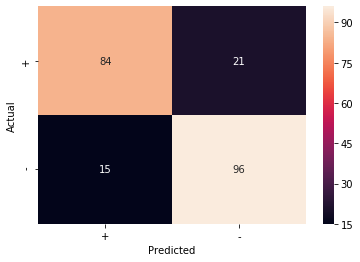

In [164]:
data = {'Actual':    Y_test,
        'Predicted': gbc.predict(X_test)
        }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
confmat = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confmat, annot=True)


Les deux algorithmes auraient été quasiment équivalents, mais le Gradient Boosting fait plus d'erreurs lorsque la variable cible est un '+'. 

Nous allons lancer une Validation Croisée afin de trouver les meilleurs paramètres. Attention, cette étape prend du temps..

In [165]:
parameters = {'n_estimators':list(range(80,260)), 'max_depth':list(range(3,8)),
              'loss':['deviance','exponential'], 
              'learning_rate': [0.1]}
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()
gbc = GridSearchCV(gbt, parameters,scoring='roc_auc')
gbc.fit(X_train,Y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                                                  verbose=0, warm_st

In [166]:
print(gbc.best_score_)

0.9474981943857522
